In [ ]:
import sys
sys.path.insert(0, "C:\\Users\\pgott\\Desktop\\Coding\\smart_coarse_grain\\utils")
import cv2 as cv
import os
from pathlib import Path
import sys
from structure_tensor import smart_structure_tensor
import torch
import numpy as np
import matplotlib.pyplot as plt
import tifffile
baseDir = r"C:\Users\pgott\Desktop\Coding\Raw images\\"
groundTruthDir = r"C:\Users\pgott\Desktop\Coding\Dataset\y\\"
inputDir = r"C:\Users\pgott\Desktop\Coding\Dataset\x\\"

coarseGrainingLength = 6

for file in os.listdir(baseDir):
    img = cv.res cv.imread(baseDir + file)
    img = np.mean(img, axis=2)
    img_tensor = torch.from_numpy(img)
    img_tensor = img_tensor.float()
    theta = smart_structure_tensor(
    img_tensor.unsqueeze(0).unsqueeze(0),
    coarseGrainAverage="gaussian",
    coarseGrainingLength=coarseGrainingLength,
    downsample=1,)
    tifffile.imwrite(groundTruthDir + file, theta)
    stride = int(coarseGrainingLength/2)
    tifffile.imwrite(inputDir + file, theta[::stride, ::stride])


(1013, 1013)


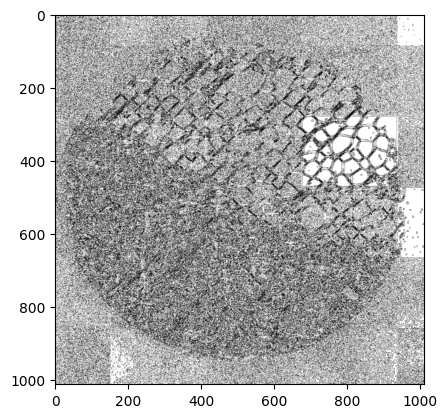

In [25]:
coarseGrainingLength = 10
plt.imshow(theta[::int(coarseGrainingLength/2), ::int(coarseGrainingLength/2)], cmap='gray')
print(theta[::int(coarseGrainingLength/2), ::int(coarseGrainingLength/2)].shape)

(array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 2.200e+01,
         4.910e+03],
        [1.320e+02, 2.270e+02, 2.670e+02, ..., 5.540e+02, 8.270e+02,
         1.431e+03],
        [1.130e+02, 2.460e+02, 2.740e+02, ..., 5.680e+02, 8.040e+02,
         1.215e+03],
        ...,
        [7.500e+01, 1.270e+02, 1.300e+02, ..., 3.470e+02, 4.870e+02,
         1.622e+03],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         5.061e+03],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         5.062e+03]], shape=(5063, 10)),
 array([2.40695430e-04, 1.57296285e-01, 3.14351857e-01, 4.71407443e-01,
        6.28463030e-01, 7.85518646e-01, 9.42574203e-01, 1.09962976e+00,
        1.25668538e+00, 1.41374099e+00, 1.57079661e+00]),
 <a list of 5063 BarContainer objects>)

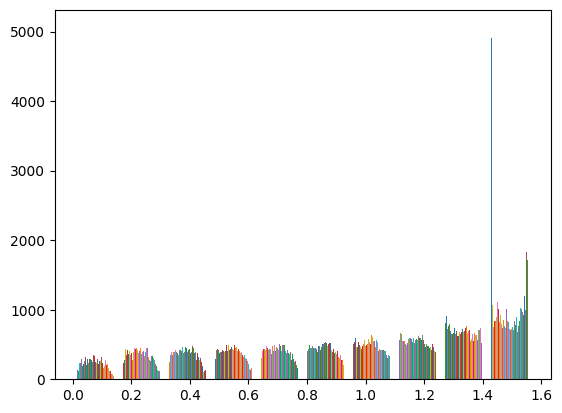

In [27]:
plt.hist(theta)